# **Linear models**

Linear models are a class of models that are widely used in practice. They make a prediction using a linear function of the input features, which we will explain shortly.

**1. Linear models for regression**

For regression, the general prediction formula for a linear model looks as follows:

ŷ = w[0] x[0] + w[1] x[1] + ... + w[p] * x[p] + b

Here, x[0] to x[p] denotes the features (in this example, the number of features is p) of a single data point, w and b are parameters of the model that are learned, and ŷ is the prediction the model makes.

For a dataset with a single feature, this is:

ŷ = w[0] * x[0] + b

which you might remember from high school mathematics as the equation for a line.

Here, w[0] is the slope and b is the y-axis offset. For more features, w contains the slopes along each feature axis. Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the entries of w.

Trying to learn the parameters w[0] and b on our one-dimensional **wave dataset** might lead to the following line

In [ ]:
!pip3 install mglearn
#!apt-get -qq install -y libfluidsynth1

w[0]: 0.393906  b: -0.031804


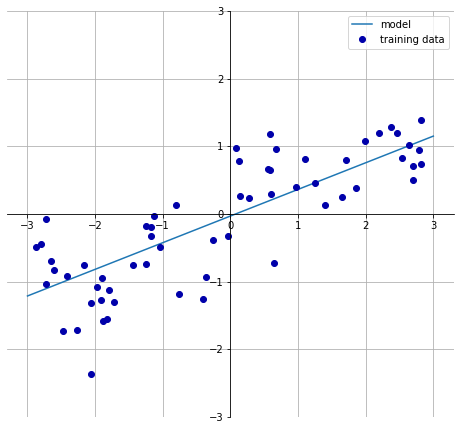

In [ ]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

We added a coordinate cross into the plot to make it easier to understand the line.

Looking at w[0] we see that the slope should be around 0.4, which we can confirm visually in the plot. The intercept is where the prediction line should cross the y-axis: this is slightly below zero, which you can also confirm in the image.

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

If you compare the predictions made by the straight line with those made by the KNeighborsRegressor in our previous lesson, using a straight line to make predictions seems very restrictive. It looks like all the fine details of the data are lost. In a sense, this is true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat skewed perspective. For datasets with many features, linear models can be very powerful. **In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.**

There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled. We will now take a look at the most popular linear models for regression.



**1.1 Linear regression (aka ordinary least squares)**

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity. Here is the code that produces the model you can see in previous figure:



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_attribute:


In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

The intercept attribute is always a single float number, while the coef attribute is a NumPy array with one entry per input feature. As we only have a single input feature in the wave dataset, lr.coef_ only has a single entry.

Let’s look at the training set and test set performance:



In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An $R^2$ score (metric for regression) of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.

Let’s take a look at how LinearRegression performs on a more complex dataset, like the Boston Housing dataset. Remember that this dataset has 506 samples and 105 derived features. First, we load the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

When comparing training set and test set scores, we find that we predict very accurately on the training set, but the  $R^2$ on the test set is much worse:

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, which we will look into next.



**1.2 Ridge regression**

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

Ridge regression is implemented in **linear_model.Ridge**. Let’s see how well it does on the extended Boston Housing dataset:



In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As you can see, the training set score of **Ridge** is lower than for **LinearRegression**, while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the **Ridge** model over the **LinearRegression** model.

The **Ridge** model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the **alpha** parameter.

In the previous example, we used the default parameter **alpha=1.0**. There is no reason why this will give us the best trade-off, though. The optimum setting of **alpha** depends on the particular dataset we are using. Increasing **alpha** forces coefficients to move more toward zero, which decreases training set performance but might help generalization. For example:



In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing **alpha** allows the coefficients to be less restricted. For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles **LinearRegression**:



In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Here, **alpha=0.1** seems to be working well. We could try decreasing alpha even more to improve generalization.

We can also get a more qualitative insight into how the **alpha** parameter changes the model by inspecting the **coef_ attribute** of models with different values of **alpha**. A higher **alpha** means a more restricted model, so we expect the entries of **coef_** to have smaller magnitude for a high value of **alpha** than for a low value of alpha. This is confirmed in the plot in figure:

*Comparing coefficient magnitudes for ridge regression with different values of alpha and linear regression*


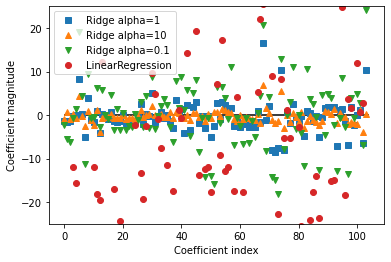

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Here, the x-axis enumerates the entries of *coef_*: $x=0$ shows the coefficient associated with the first feature, $x=1$ the coefficient associated with the second feature, and so on up to $x=100$. The y-axis shows the numeric values of the corresponding values of the coefficients.

The main takeaway here is that for **alpha=10**, the coefficients are mostly between around –3 and 3. The coefficients for the Ridge model with **alpha=1** are somewhat larger. The dots corresponding to **alpha=0.1** have larger magnitude still, and many of the dots corresponding to linear regression without any regularization (which would be **alpha=0**) are so large they are outside of the chart.

Another way to understand the influence of **regularization** is to fix a value of **alpha** but vary the amount of training data available. For next figure, we subsampled the Boston Housing dataset and evaluated **LinearRegression** and **Ridge(alpha=1)** on subsets of increasing size (plots that show model performance as a function of dataset size are called learning curves):

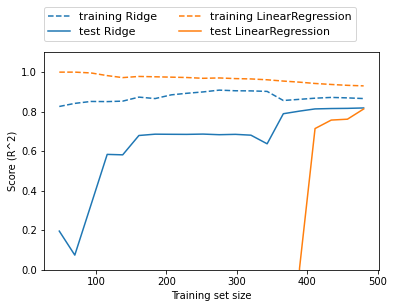

In [ ]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because Ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end.

The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance. Another interesting aspect is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.



**1.3 Lasso**

An alternative to **Ridge** for regularizing linear regression is **Lasso**. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization.

The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

Let’s apply the lasso to the extended Boston Housing dataset:



In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, **Lasso** does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features.

Similarly to **Ridge**, the **Lasso** also has a regularization parameter, **alpha**, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of **alpha=1.0**. To reduce underfitting, let’s try decreasing **alpha**. When we do this, we also need to increase the default setting of **max_iter** (the maximum number of iterations to run):

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower **alpha** allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using **Ridge**, and we are using only 33 of the 105 features. This makes this model potentially easier to understand. If we set **alpha** too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to **LinearRegression**:

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Again, we can plot the coefficients of the different models. The result is shown in the next figure:

*Comparing coefficient magnitudes for lasso regression with different values of alpha and ridge regression*



Text(0, 0.5, 'Coefficient magnitude')

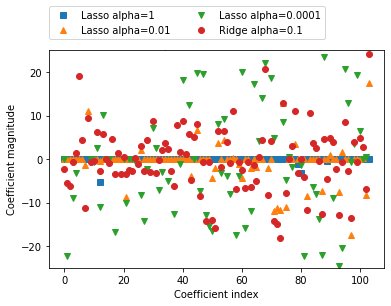

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For **alpha=1**, we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. Decreasing **alpha** to 0.01, we obtain the solution shown as the orange dots, which causes most features to be exactly zero. Using **alpha=0.00001**, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude. For comparison, the best **Ridge** solution is shown. The **Ridge** model with **alpha=0.1** has similar predictive performance as the **Lasso** model with **alpha=0.01**, but using Ridge, all coefficients are nonzero.

In practice, ridge regression is usually the first choice between these two models. *However, if you have a large amount of features and expect only a few of them to be important, **Lasso** might be a better choice.* Similarly, if you would like to have a model that is easy to interpret, **Lasso** will provide a model that is easier to understand, as it will select only a subset of the input features.

scikit-learn also provides the **ElasticNet** class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.



**2. Linear models for classification. Logistic Regression and Linear SVM**





Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:

$ŷ = w[0] x[0] + w[1] x[1] + ... + w[p] * x[p] + b > 0$

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients (w) and the intercept (b).

For linear models for regression, the output, ŷ, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. We will see examples of that in this section.

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:



*   The way in which they measure how well a particular combination of coefficients and intercept fits the training data
*    If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set well” means. For technical mathematical reasons, it is not possible to adjust w and b to minimize the number of misclassifications the algorithms produce, as one might hope. For our purposes, and many applications, the different choices for item 1 in the preceding list (called **loss functions**) are of little significance.


The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in **svm.LinearSVC** (SVC stands for support vector classifier).

Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.

We can apply the **LogisticRegression** and **LinearSVC** models to the forge dataset, and visualize the decision boundary as found by the linear models:

*Decision boundaries of a linear SVM and logistic regression on the forge dataset*


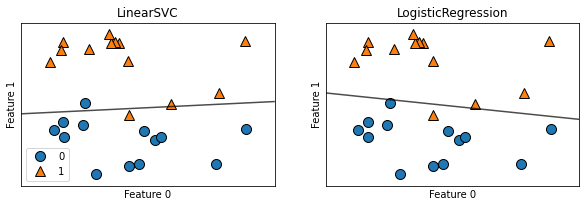

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

#X, y = mglearn.datasets.make_forge()
# generate dataset
X, y = make_blobs(n_samples=26, centers=2, random_state=4)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(max_iter=100000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In this figure, we have the first feature of the forge dataset on the x-axis and the second feature on the y-axis, as before. We display the decision boundaries found by LinearSVC and LogisticRegression respectively as straight lines, separating the area classified as class 1 on the top from the area classified as class 0 on the bottom. In other words, any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0.

The two models come up with similar decision boundaries. Note that both misclassify some of the points. By default, both models apply an L2 regularization, in the same way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. Here is an illustration using **LinearSVC**:



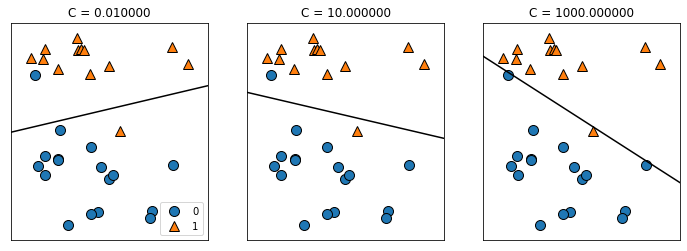

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization. The strongly regularized model chooses a relatively horizontal line, misclassifying two points.

In the center plot, C is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary.

Finally, on the righthand side, the very high value of C in the model tilts the decision boundary a lot, now correctly classifying all points in class 0. One of the points in class 1 is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight line. The model illustrated on the righthand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well. In other words, this model is likely overfitting.

Similarly to the case of regression, linear models for classification might seem very restrictive in low-dimensional spaces, only allowing for decision boundaries that are straight lines or planes. Again, in high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important when considering more features.

Let’s analyze **LinearLogistic** in more detail on the Breast Cancer dataset:



In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


The default value of **C=1** provides quite good performance, with 95% accuracy on both the training and the test set. But as training and test set performance are very close, it is likely that we are underfitting.

Let’s try to increase C to fit a more flexible model:



In [ ]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.972


Using **C=100** results in higher training set accuracy, and also a slightly increased test set accuracy, confirming our intuition that a more complex model should perform better.

We can also investigate what happens if we use an even more regularized model than the default of C=1, by setting C=0.001:

In [ ]:
logreg001 = LogisticRegression(C=0.001, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.944


As expected, both training and test set accuracy decrease relative to the default parameters.

Finally, let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C:

*Coefficients learned by logistic regression on the Breast Cancer dataset for different values of C*

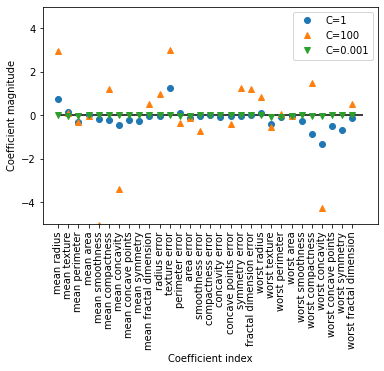

In [ ]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default, the result looks similar to that produced by Ridge. Stronger regularization pushes coefficients more and more toward zero, though coefficients never become exactly zero.

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization:

*Coefficients learned by logistic regression with L1 penalty on the Breast Cancer dataset for different values of C*

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


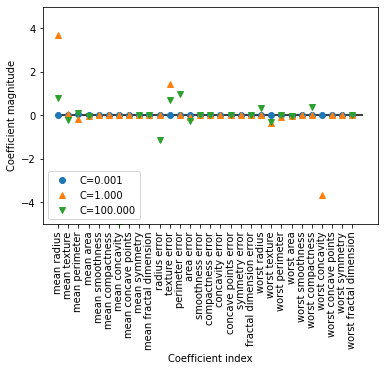

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=10000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

As you can see, there are many parallels between linear models for binary classification and linear models for regression. As in regression, the main difference between the models is the penalty parameter, which influences the regularization and whether the model will use all available features or select only a subset.



**3. Linear models for multiclass classification**

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the **one-vs.-rest** (or one-vs.-all or one-against-all) approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (w) and one intercept (b) for each class. The class for which the result of the classification confidence formula given here is highest is the assigned class label:

$w[0] x[0] + w[1] x[1] + ... + w[p] * x[p] + b$

The mathematics behind multiclass logistic regression differ somewhat from the onevs.- rest approach, but they also result in one coefficient vector and intercept per class, and the same method of making a prediction is applied.

Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution (see the figure):



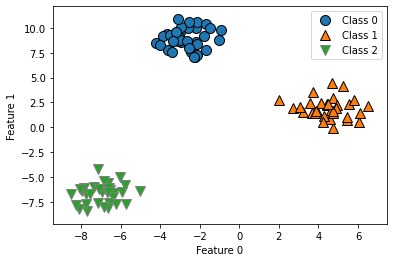

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Now, we train a LinearSVC classifier on the dataset:



In [ ]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We see that the shape of the **coef**_ is (3, 2), meaning that each row of **coef**_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset).

The **intercept**_ is now a one-dimensional array, storing the intercepts for each class.

Let’s visualize the lines given by the three binary classifiers

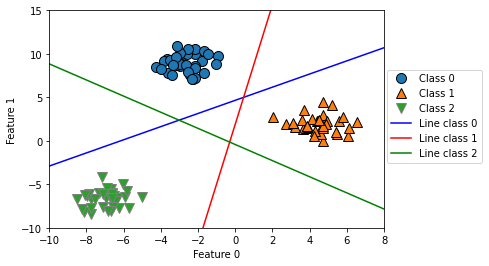

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

You can see that all the points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the “class 0” side of this binary classifier. The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2. The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as “rest.” Therefore, any point in this area will be classified as class 0 by the final classifier (the result of the classification confidence formula for classifier 0 is greater than zero, while it is smaller than zero for the other two classes).

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.

The following example shows the predictions for all regions of the 2D space:

*Multiclass decision boundaries derived from the three one-vs.-rest classifiers*

Text(0, 0.5, 'Feature 1')

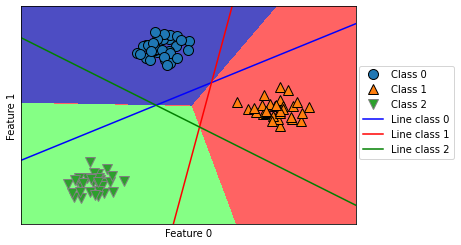

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## **Strengths, weaknesses, and parameters**

The main parameter of linear models is the regularization parameter, called **alpha** in the regression models and **C** in LinearSVC and LogisticRegression. Large values for alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale.

The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge, which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.

Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.

Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. However, in lower-dimensional spaces, other models might yield better generalization performance. We will look at some examples in which linear models fail in “Kernelized Support Vector Machines” later in our course.